# loading  libraries


In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


# Loading Dataset

In [2]:
df = pd.read_csv('House_price.csv')

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Exploring Datset

In [4]:
df.shape

(1460, 81)

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Cleaning Data

# Missing Values

In [7]:
Isnull = df.isnull().sum()
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [8]:
Isnull = df.isnull().sum()/len(df)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

Text(0, 0.5, 'Count')

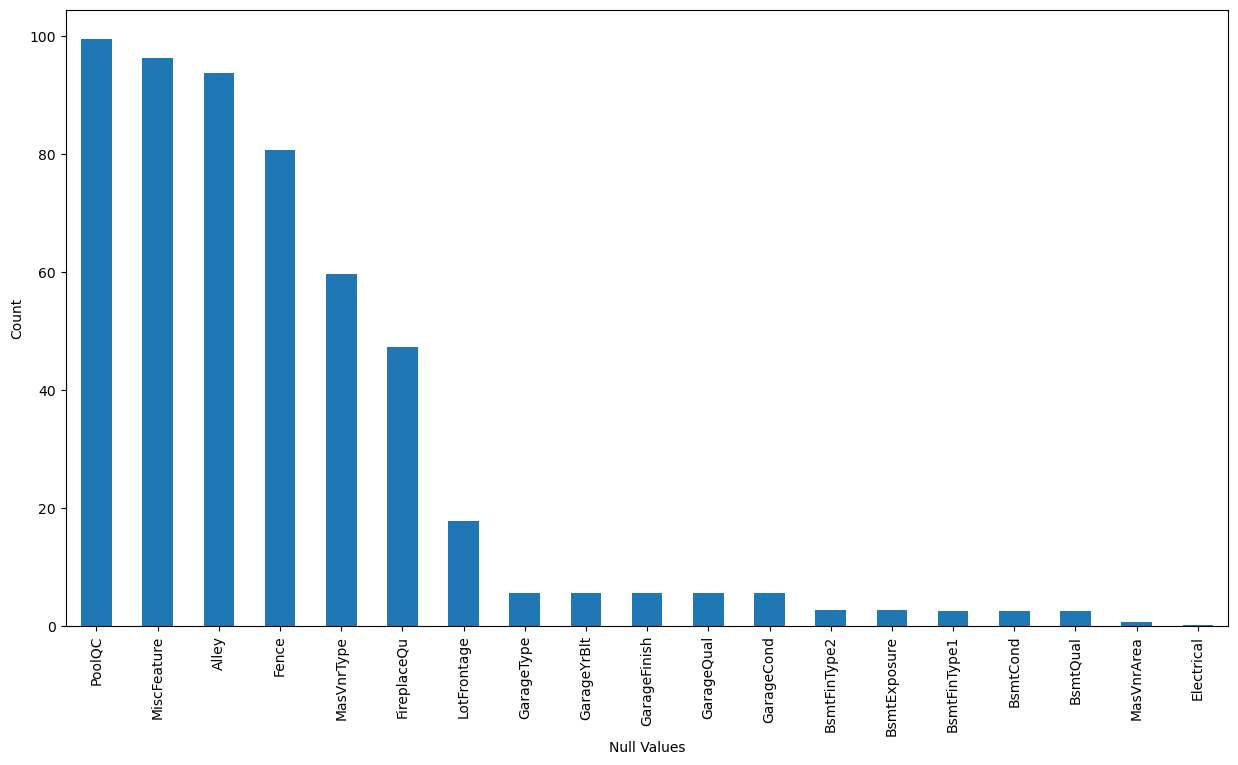

In [9]:
plt.figure(figsize=(15,8))
Isnull.plot.bar()
plt.xlabel('Null Values')
plt.ylabel('Count')

In [10]:
drop_col = ['Alley','PoolQC','Fence','MiscFeature']
df.drop(drop_col, inplace=True,axis=1)


In [11]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [12]:
df.shape

(1460, 77)

In [13]:
Isnull = df.isnull().sum()/len(df)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

Text(0, 0.5, 'Count')

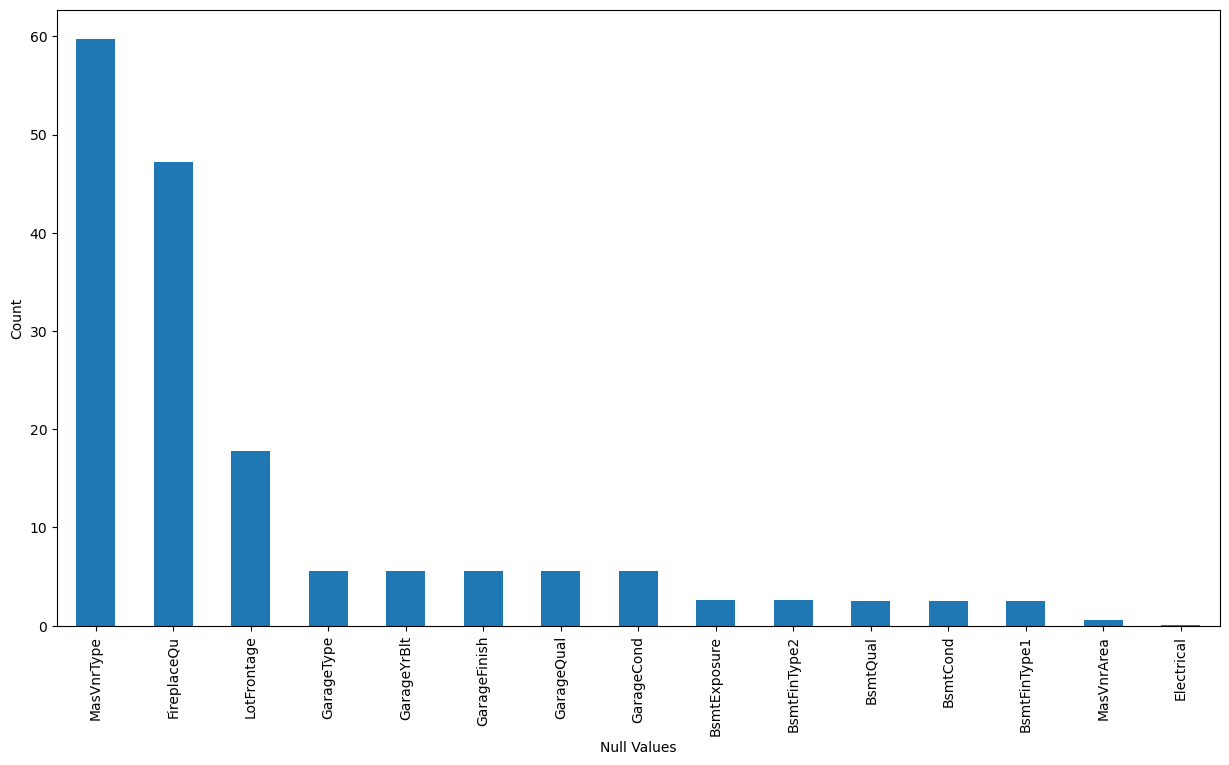

In [14]:
plt.figure(figsize=(15,8))
Isnull.plot.bar()
plt.xlabel('Null Values')
plt.ylabel('Count')

# Duplicate Value

In [15]:
df.duplicated().sum()

0

# Distribution of Target Variable

C:\Users\kubra\AppData\Local\Temp\ipykernel_3824\1030410902.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], fit=stats.norm)


Text(0, 0.5, 'Frequency')

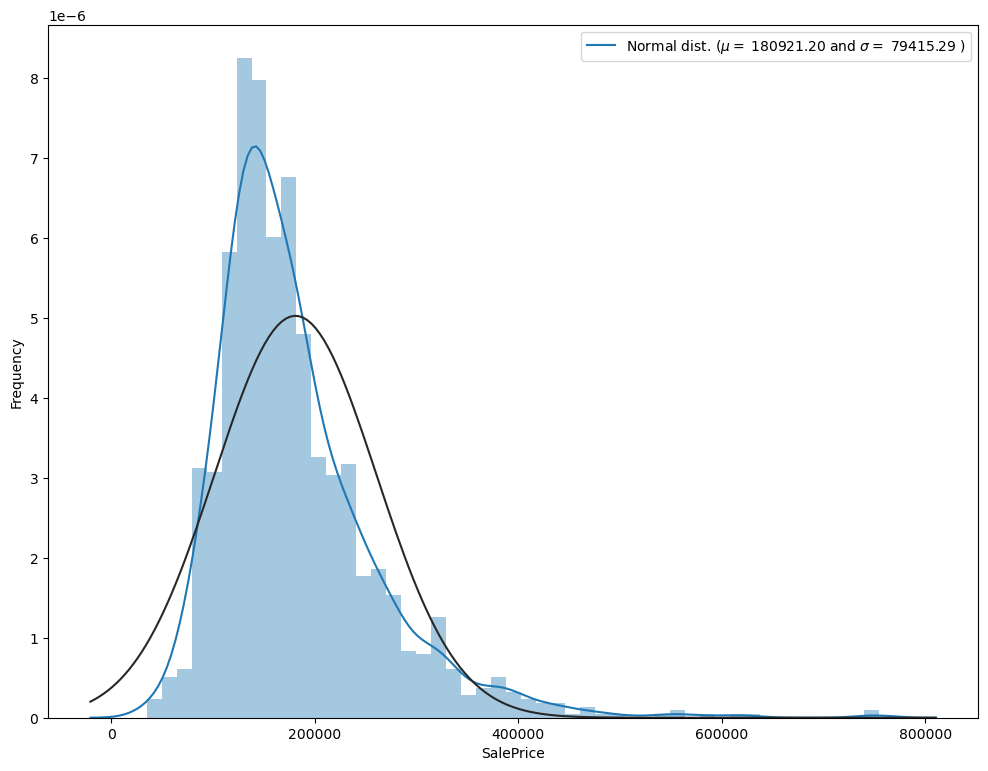

In [16]:
from scipy import stats

plt.subplots(figsize=(12,9))
sns.distplot(df['SalePrice'], fit=stats.norm)

(mu, sigma) = stats.norm.fit(df['SalePrice'])

# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

In [17]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\kubra\AppData\Local\Temp\ipykernel_3824\1575923650.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], fit=stats.norm)


Text(0, 0.5, 'Frequency')

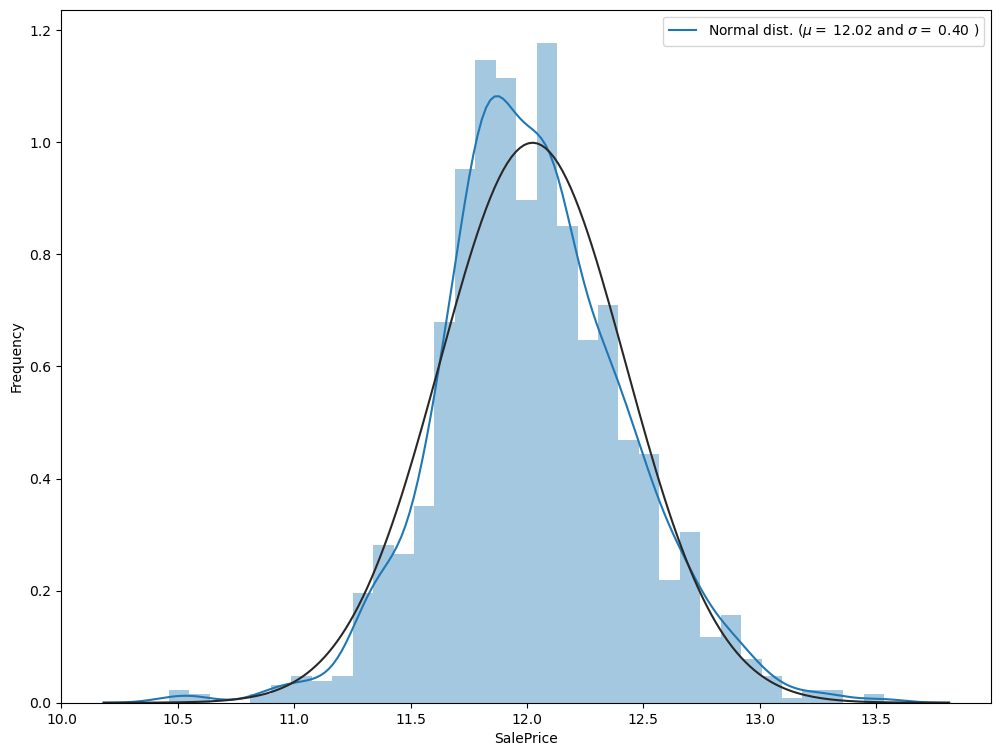

In [18]:
#we use log function which is in numpy
df['SalePrice'] = np.log1p(df['SalePrice'])

#Check again for more normal distribution
plt.subplots(figsize=(12,9))
sns.distplot(df['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(df['SalePrice'])

# plot with the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

# Separating categorical & Numerical columns

In [19]:
df_cat=df.select_dtypes("object")
df_num=df.select_dtypes("number")

In [20]:
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,12.247699
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,12.109016
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,12.317171
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,11.849405
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,12.429220


In [21]:
df_num.shape

(1460, 38)

In [22]:
df_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [23]:
df_cat.shape

(1460, 39)

# Correlation

<Axes: >

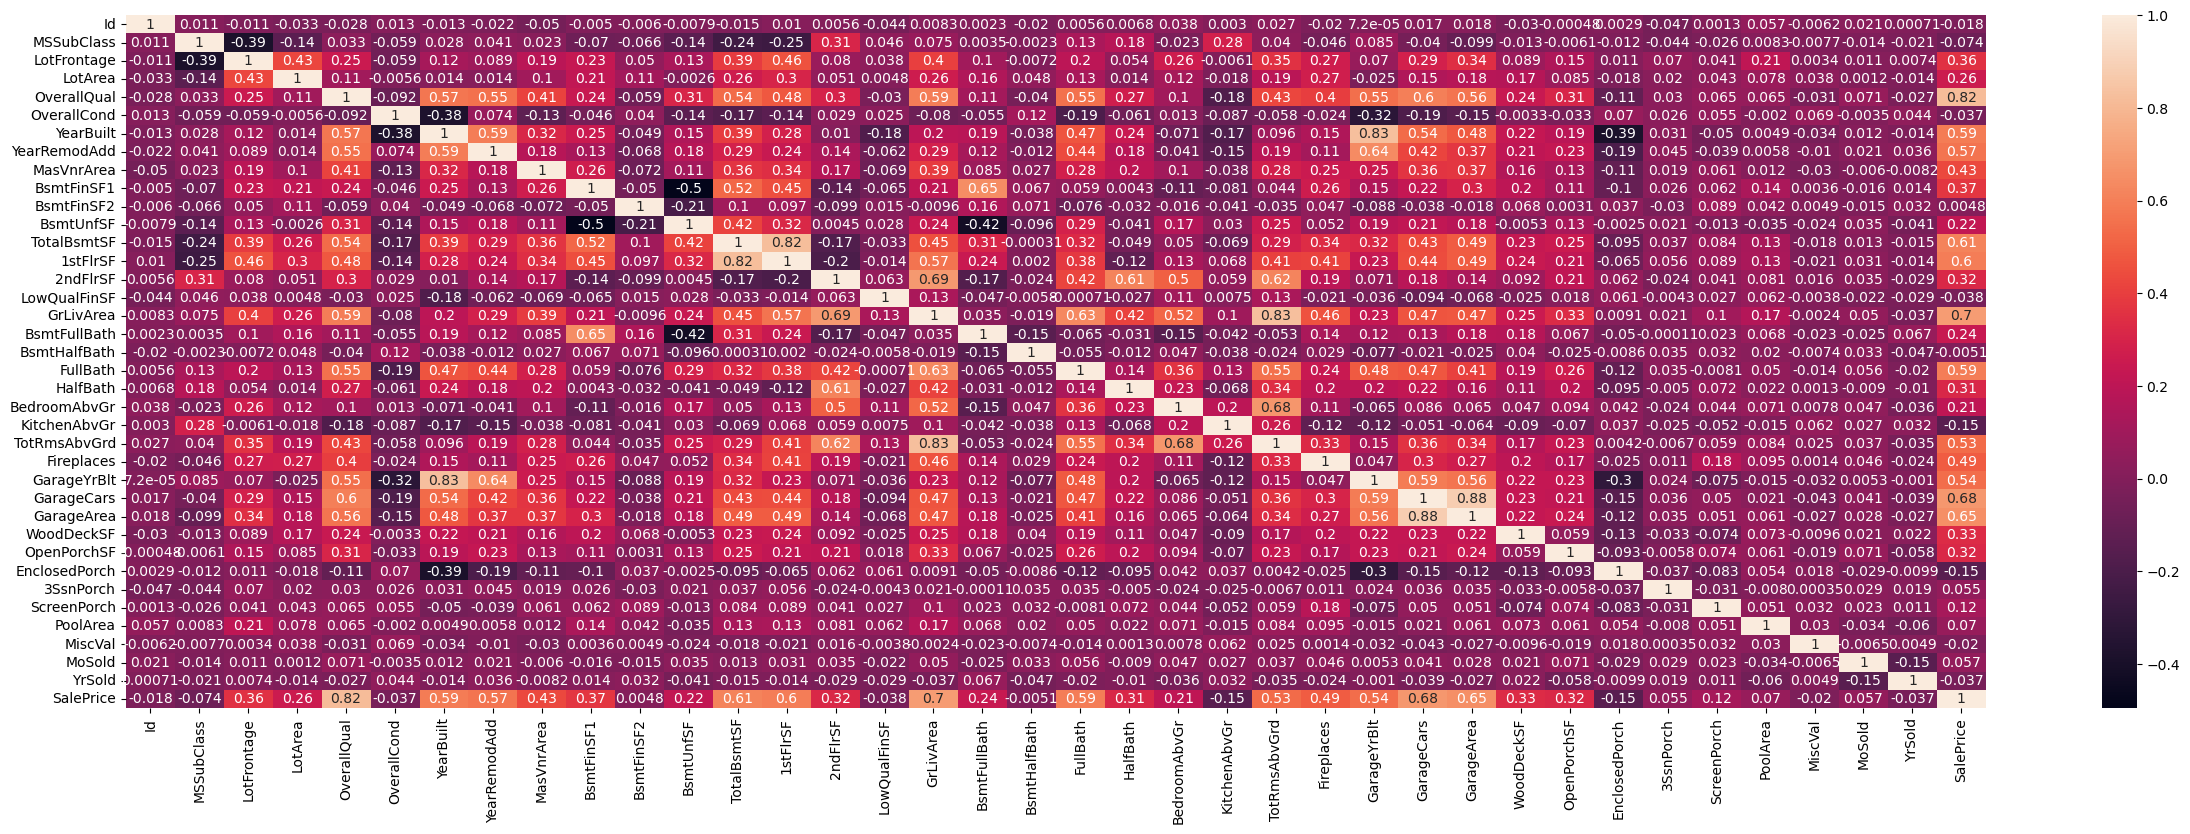

In [24]:
corr = df_num.corr()
plt.subplots(figsize=(30,9))
sns.heatmap(corr, annot=True)

In [25]:
print("Find most important features relative to target")
corr = df_num.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find most important features relative to target


SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

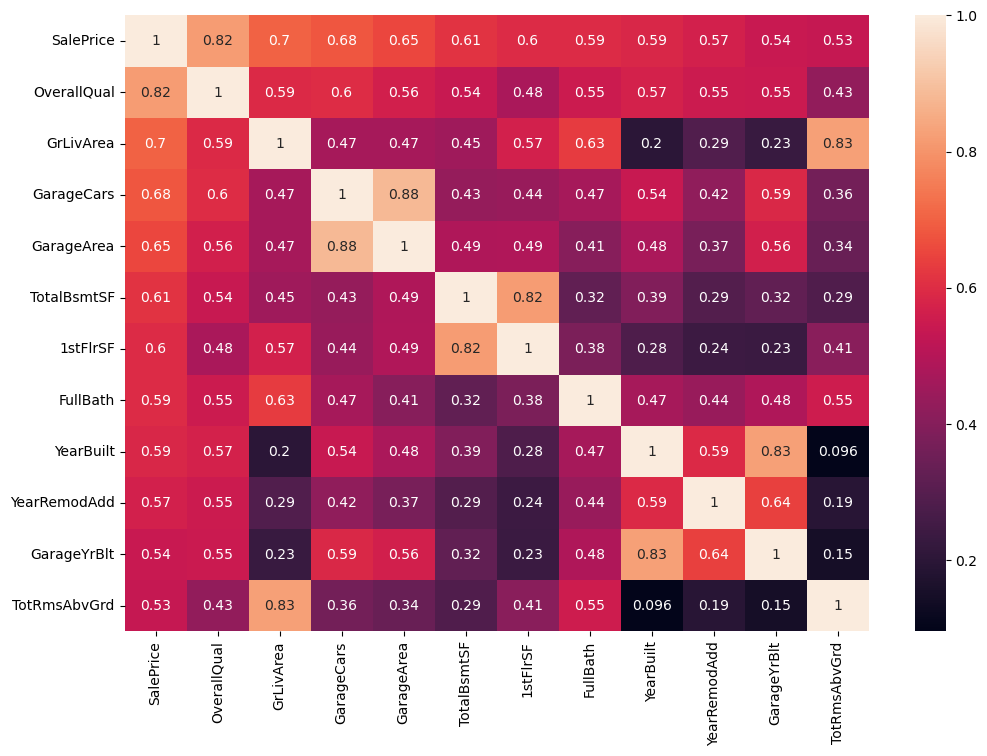

In [26]:
thres = (corr['SalePrice'] > 0.5) | (corr['SalePrice'] < -0.5)
top_feature = corr.index[abs(thres)]

plt.subplots(figsize=(12, 8))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [27]:
top_feature

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
       'GarageYrBlt', 'TotRmsAbvGrd'],
      dtype='object')

# Dropping Columns of low corelation

In [28]:
drop_col = ['Id', 'MSSubClass', 'LowQualFinSF', 'BsmtFinSF2', 'MiscVal', 'OverallCond', 'YrSold', 'PoolArea', 'MoSold', 'ScreenPorch', 'BsmtHalfBath']
df.drop(drop_col, inplace=True, axis=1)

In [29]:
df.shape

(1460, 66)

In [30]:
df_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

# Handling Missing Values

In [31]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

#GarageType, GarageFinish, GarageQual and GarageCond these are replacing with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[col] = df[col].fillna('None')

#GarageYrBlt, GarageArea and GarageCars these are replacing with zero
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    df[col] = df[col].fillna(int(0))

#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual these are replacing with None
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    df[col] = df[col].fillna('None')

df['Electrical'] = df['Electrical'].fillna(df['Electrical']).mode()[0]

df['MasVnrArea'] = df['MasVnrArea'].fillna(int(0))

df['MasVnrType'] = df['MasVnrType'].fillna('None')

df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())


In [32]:
df.isnull().sum()

MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
                ..
EnclosedPorch    0
3SsnPorch        0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 66, dtype: int64

In [33]:
df_cat=df.select_dtypes("object")
df_num=df.select_dtypes("number")

In [34]:
df_cat.shape

(1460, 39)

In [35]:
df_num.shape

(1460, 27)

# Dealing Categorical Columns

In [36]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

for col in df_cat.columns:
    df_cat[col] = labelencoder.fit_transform(df_cat[col])

In [37]:
df_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,2,6,3,1,2,5,5,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,3,6,5,1,2,5,5,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,2,6,5,1,2,5,5,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,2,6,2,5,3,5,5,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,2,6,5,1,2,5,5,2,8,4


In [38]:
# Concatenating encoded categorical data with numerical data
df = pd.concat([df_cat, df_num], axis=1, join='outer')
df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,SalePrice
0,3,1,3,3,0,4,0,5,2,2,...,8,0,2003.0,2,548,0,61,0,0,12.247699
1,3,1,3,3,0,2,0,24,1,2,...,6,1,1976.0,2,460,298,0,0,0,12.109016
2,3,1,0,3,0,4,0,5,2,2,...,6,1,2001.0,2,608,0,42,0,0,12.317171
3,3,1,0,3,0,0,0,6,2,2,...,7,1,1998.0,3,642,0,35,272,0,11.849405
4,3,1,0,3,0,2,0,15,2,2,...,9,1,2000.0,3,836,192,84,0,0,12.429220


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   int32  
 1   Street         1460 non-null   int32  
 2   LotShape       1460 non-null   int32  
 3   LandContour    1460 non-null   int32  
 4   Utilities      1460 non-null   int32  
 5   LotConfig      1460 non-null   int32  
 6   LandSlope      1460 non-null   int32  
 7   Neighborhood   1460 non-null   int32  
 8   Condition1     1460 non-null   int32  
 9   Condition2     1460 non-null   int32  
 10  BldgType       1460 non-null   int32  
 11  HouseStyle     1460 non-null   int32  
 12  RoofStyle      1460 non-null   int32  
 13  RoofMatl       1460 non-null   int32  
 14  Exterior1st    1460 non-null   int32  
 15  Exterior2nd    1460 non-null   int32  
 16  MasVnrType     1460 non-null   int32  
 17  ExterQual      1460 non-null   int32  
 18  ExterCon

# Preparing the Data for Modeling

In [40]:
y = df['SalePrice']
#Take their values in X and y
X = df.drop('SalePrice', axis = 1).values
y = y.values

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Models

# Linear Regression---> Accuracy : 88.56

In [42]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
#Fit the model
model1.fit(X_train, y_train)



LinearRegression()

In [43]:
#Score/Accuracy
print("Accuracy --> ", model1.score(X_test, y_test)*100)

Accuracy -->  88.5611968495221


# Prediction

In [44]:
y_predict1=model1.predict(X_test)

In [45]:
test1=pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_predict1
})

In [46]:
test1.head(20)

,Actual,Y test predicted
0,11.931642,11.930775
1,12.149508,12.217554
2,12.059809,12.084833
3,11.002117,11.522013
4,11.719948,11.718184
5,12.669810,12.605058
6,11.867104,11.887711
7,11.728045,11.761578
8,11.827744,11.840537
9,11.771444,11.726761


In [47]:
#Prediction
print("Predict value " + str(model1.predict([X_test[150]])))
print("Real value " + str(y_test[150]))

Predict value [11.8654326]
Real value 12.103491596905931


# Random Forest Regressor---> Accuracy : 89.10

In [48]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=1000)
#Fit
model2.fit(X_train, y_train)


RandomForestRegressor(n_estimators=1000)

In [49]:
#Score/Accuracy

print("Accuracy --> ", model2.score(X_test, y_test)*100)

Accuracy -->  89.07392943457937


# Prediction

In [50]:
y_predict2=model2.predict(X_test)

In [51]:
test2=pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_predict2
    })

In [52]:
test2.head(20)

,Actual,Y test predicted
0,11.931642,11.892919
1,12.149508,12.145914
2,12.059809,12.031899
3,11.002117,11.794287
4,11.719948,11.800798
5,12.669810,12.597182
6,11.867104,11.885142
7,11.728045,11.586877
8,11.827744,11.852511
9,11.771444,11.663969


In [53]:
#Prediction
print("Predict value " + str(model2.predict([X_test[142]])))
print("Real value " + str(y_test[142]))

Predict value [11.69558898]
Real value 11.767187766223199


# Grading Bosting Regressor ---> Accuracy: 90.57

In [54]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)
#Fit
GBR.fit(X_train, y_train)




GradientBoostingRegressor(max_depth=4)

In [55]:
#Score/Accuracy
print("Accuracy --> ", GBR.score(X_test, y_test)*100)

Accuracy -->  90.57003634926015


# Prediction

In [56]:
y_predict3=GBR.predict(X_test)

In [57]:
test3=pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_predict3
})

In [58]:
test3.head(20)

,Actual,Y test predicted
0,11.931642,11.927687
1,12.149508,12.175367
2,12.059809,12.039914
3,11.002117,11.707292
4,11.719948,11.774541
5,12.669810,12.605218
6,11.867104,11.841572
7,11.728045,11.712048
8,11.827744,11.867660
9,11.771444,11.714265


In [59]:
#Prediction
print("Predict value " + str(GBR.predict([X_test[142]])))
print("Real value " + str(y_test[142]))

Predict value [11.66710772]
Real value 11.767187766223199
